In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import time

t1=time.time()
mnist_train_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\train.csv'

train=np.genfromtxt(mnist_train_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
# np.genfromtxt - 파일로부터 배열 생성 / delimiter - 구분자 / skip_header=1 (정수까지 해당되는 라인까지 제거시켜 데이터를 입력받음)
t2=time.time()

print("Process Time: " + str(t2-t1))
print(train)

t1=time.time()
mnist_test_data_path='C:\\Users\\1-10\\Desktop\\python\\01_MNIST_Kaggle_data\\test.csv'

test=np.genfromtxt(mnist_test_data_path, delimiter=',', skip_header=1).astype(np.dtype('uint8'))
t2=time.time()

print("Process Time " + str(t2-t1))
print(test)

print(train.shape)
print(test.shape)

train_data=train[:,1:] # 컬럼 784개로 존재할 것 # train의 문제지
train_labels=train[:,0] # 1번째 컬럼은 라벨로 존재 # train의 정답지 

print(train_data)
print(train_labels)

Process Time: 20.357593059539795
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
Process Time 13.257303953170776
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 785)
(28000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [15]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin'

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [16]:
# decision tree 
X=train_data
y=train_labels

reg_tree=tree.DecisionTreeRegressor(max_leaf_nodes=5)
reg_tree.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

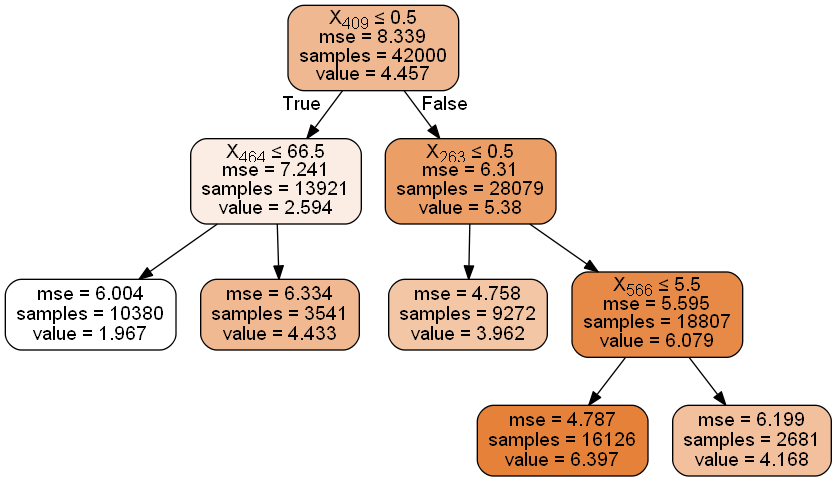

In [17]:
dot_data=StringIO()

export_graphviz(reg_tree, out_file=dot_data, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

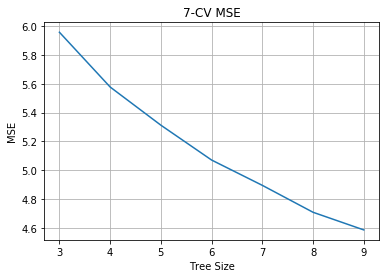

In [18]:
tree_size=range(3,10)
MSE_scores=[]

for size in tree_size:
    reg_tree=tree.DecisionTreeRegressor(max_leaf_nodes=size, random_state=123)
    MSE_s=-cross_val_score(reg_tree,X,y,cv=7,scoring='neg_mean_squared_error')
    MSE_scores.append(np.mean(MSE_s))
    
plt.plot(tree_size, MSE_scores)
plt.title('7-CV MSE')
plt.xlabel('Tree Size')
plt.ylabel('MSE')
plt.grid(True)

In [19]:
#  데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1234)

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
